<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/univeral_tensor_network_paper__reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
# add path to .py files for import
import sys
sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

Cloning into 'Tensor-Networks-Simple-Update'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 200 (delta 111), reused 125 (delta 53), pack-reused 0
Receiving objects: 100% (200/200), 85.58 KiB | 12.22 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from TensorNetwork import TensorNetwork
import SimpleUpdate as su

np.random.seed(216)

In [ ]:
# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])
s_i = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_j = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_k = [pauli_x / 2.]

In [30]:
# The Tensor Network structure matrix
chain_structure_matrix = np.array([[1, 2],
                                  [1, 2]])

# Simple-Update parameters
d_max_chain = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60]
error = 1e-6
max_iterations = 200
chain_energy = []
j_ij_chain = [1., 1.]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_chain:
    chain = TensorNetwork(structure_matrix=chain_structure_matrix, virtual_size=2)
    chain_su = su.SimpleUpdate(tensor_network=chain, 
                               dts=dts, 
                               j_ij=j_ij_chain, 
                               h_k=h_k, 
                               s_i=s_i, 
                               s_j=s_j, 
                               s_k=s_k, 
                               d_max=d_max, 
                               max_iterations=max_iterations, 
                               convergence_error=error, 
                               log_energy=True,
                               print_process=False)
    chain_su.run()
    energy = chain_su.energy_per_site()
    print(f'| D max: {d_max} | Chain Energy: {energy}\n')
    chain_energy.append(energy)

Simple Update converged. final error is 0.0000000037

| D max: 2 | Chain Energy: -0.42788481552077

Simple Update converged. final error is 0.0000000044

| D max: 3 | Chain Energy: -0.4357550767762163



KeyboardInterrupt: ignored

In [ ]:
# The Tensor Network structure matrix
peps_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 3, 4, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 3, 4,],
                                  [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_peps = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
error = 1e-6
max_iterations = 200
peps_energy = []
j_ij_peps = [1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_peps:
    peps = TensorNetwork(structure_matrix=peps_structure_matrix, virtual_size=2)
    peps_su = su.SimpleUpdate(tensor_network=peps, 
                              dts=dts, 
                              j_ij=j_ij_peps, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=False)
    peps_su.run()
    energy = peps_su.energy_per_site()
    print(f'| D max: {d_max} | PEPS Energy: {energy}\n')
    peps_energy.append(energy)

In [ ]:
# The Tensor Network structure matrix
star_structure_matrix = np.array([[1, 2, 3, 0, 0, 0, 0, 0, 0],
                                  [1, 0, 0, 2, 3, 0, 0, 0, 0],
                                  [0, 1, 0, 2, 0, 3, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 2, 3, 0],
                                  [0, 0, 0, 0, 1, 0, 2, 0, 3],
                                  [0, 0, 1, 0, 0, 0, 0, 2, 3]])
# Simple-Update parameters
d_max_star = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60]
error = 1e-6
max_iterations = 200
star_energy = []
j_ij_star = [1, 1, 0.05, 1, 0.05, 0.05, 1, 1, 1]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_star:
    star = TensorNetwork(structure_matrix=star_structure_matrix, virtual_size=2)
    star_su = su.SimpleUpdate(tensor_network=star, 
                              dts=dts, 
                              j_ij=j_ij_star, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=False)
    star_su.run()
    energy = star_su.energy_per_site()
    print(f'| D max: {d_max} | Star Energy: {energy}\n')
    star_energy.append(energy)

In [ ]:
# The Tensor Network structure matrix
cube_structure_matrix = np.array([[1, 2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 0, 0, 5, 6]])

# Simple-Update parameters
d_max_cube = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
error = 1e-6
max_iterations = 200
cube_energy = []
j_ij_cube = [1.] * 23
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_cube:
    cube = TensorNetwork(structure_matrix=cube_structure_matrix, virtual_size=2)
    cube_su = su.SimpleUpdate(tensor_network=cube, 
                              dts=dts, 
                              j_ij=j_ij_cube, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=False)
    cube_su.run()
    energy = cube_su.energy_per_site()
    print(f'| D max: {d_max} | Cube Energy: {energy}\n')
    cube_energy.append(energy)

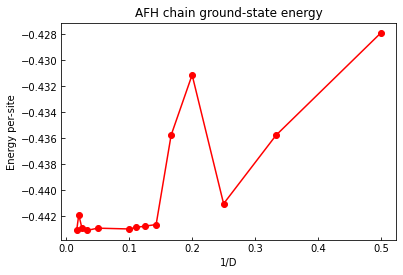

In [21]:
fig, ax = plt.subplots(1, 1)
ax.plot(1 / np.array(d_list), mps_energy, '-o', color='red')
ax.set_xlabel(r'1/D')
ax.set_ylabel(r'Energy per-site')
ax.set_title('AFH chain ground-state energy')
ax.tick_params(direction='in', axis='both')